# Preparing dataset

In [90]:
from prepare_data import *

prepare_functions = {
    # 'NyalaData': prepare_nyala_data,
    # 'ZindiTurtleRecall': prepare_zindi_turtle_recall,
    # 'BelugaID': prepare_beluga_id,
    # 'BirdIndividualID': prepare_bird_individual_id,
    # 'SealID': prepare_seal_id,
    # 'FriesianCattle2015': prepare_friesian_cattle_2015,
    # 'ATRW': prepare_atrw,
    # 'NDD20': prepare_ndd20,
    # 'SMALST': prepare_smalst,
    # 'SeaTurtleIDHeads': prepare_sea_turtle_id_heads,
    # 'AAUZebraFish': prepare_zebra_fish,
    # 'CZoo': prepare_czoo,
    # 'CTai': prepare_ctai,
    # 'Giraffes': prepare_giraffes,
    # 'HyenaID2022': prepare_hyena_id_2022,
    # 'MacaqueFaces': prepare_macaque_faces,
    # 'OpenCows2020': prepare_open_cows_2020,
    # 'StripeSpotter': prepare_stripe_spotter,
    # 'AerialCattle2017': prepare_aerial_cattle_2017,
    # 'GiraffeZebraID': prepare_giraffe_zebra_id,
    # 'IPanda50': prepare_ipanda_50,
    # 'WhaleSharkID': prepare_whaleshark_id,
    # 'FriesianCattle2017': prepare_friesian_cattle_2017,
    # 'Cows2021': prepare_cows2021,
    # 'LeopardID2022': prepare_leopard_id_2022,
    # 'NOAARightWhale': prepare_noaa_right_whale,
    # 'HappyWhale': prepare_happy_whale,
    # 'HumpbackWhaleID': prepare_humpback_whale_id,
    'LionData': prepare_lion_data
}

datasets_folder = 'data'  # Path to downloaded datasets


In [ ]:

# Create folders with images resized to 256 and 518
for name, prepare in prepare_functions.items():
    print(name)
    prepare(size=256, root= fr'{datasets_folder}\{name}', new_root=fr'images\size-256\{name}')
    # prepare(size=518, root=fr'{datasets_folder}\{name}', new_root=fr'images\size-518\{name}')

    # Metadata should be the same
    # metadata_256 = pd.read_csv(fr'images\size-256\{name}\annotations.csv', index_col=0)
    # metadata_518 = pd.read_csv(f'images/size-518/{name}/annotations.csv', index_col=0)
    # assert metadata_256.equals(metadata_518)

In [ ]:
# # Code to add metadata files. Can also download them directly from the dataset page


# # Create dataframe with training / test set splits
# from wildlife_datasets import splits
# for name in prepare_functions:
#     metadata = pd.read_csv(f'images/size-256/{name}/annotations.csv', index_col=0)
#     splitter = splits.ClosedSetSplit(0.8, identity_skip='unknown', seed=666)
#     idx_train, idx_test = splitter.split(metadata)[0]

#     metadata.loc[metadata.index[idx_train], 'split'] = 'train'
#     metadata.loc[metadata.index[idx_test], 'split'] = 'test'

#     os.makedirs(f'metadata/datasets/{name}/', exist_ok=True)
#     metadata.to_csv(f'metadata/datasets/{name}/metadata.csv')

In [23]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class ArcFaceLoss(nn.Module):
#     def __init__(self, num_classes, embedding_size, margin=0.5, scale=64.0):
#         super(ArcFaceLoss, self).__init__()
#         self.num_classes = num_classes
#         self.embedding_size = embedding_size
#         self.margin = margin
#         self.scale = scale
#         self.W = nn.Parameter(torch.randn(embedding_size, num_classes))

#     def forward(self, embeddings, labels):
#         # Normalize input embeddings
#         embeddings = F.normalize(embeddings, p=2, dim=1)
#         # Normalize weights
#         W = F.normalize(self.W, p=2, dim=0)
#         # Compute cosine similarity between embeddings and weights
#         cosine = torch.matmul(embeddings, W)
#         # Add margin to cosine similarity for target classes
#         cosine_target = cosine - self.margin * (torch.eq(labels.view(-1,1), torch.arange(self.num_classes).to(labels.device)).float() - cosine)
#         # Scale cosine similarity
#         logits = self.scale * cosine_target
#         # Compute cross-entropy loss
#         loss = F.cross_entropy(logits, labels)
#         return loss


# MegaDescriptor-L-384

###### Don't run this again and again !

In [1]:
import pandas as pd
from torchvision import transforms as T
from timm import create_model

from wildlife_tools.features import DeepFeatures
from wildlife_tools.data import WildlifeDataset, SplitMetadata
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier
import torch

devic = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = create_model("hf-hub:BVRA/MegaDescriptor-L-224", pretrained=True)
extractor = DeepFeatures(model, device=devic)

root_images = r'images\size-256'
root_metadata = r'metadata\datasets'

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abhin\.cache\huggingface\hub\models--BVRA--MegaDescriptor-L-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer m

In [15]:
datasets = [
    # 'BirdIndividualID',
    # 'SealID',
    # 'FriesianCattle2015',
    # 'ATRW',
    # 'NDD20',
    # 'SMALST',
    # 'SeaTurtleIDHeads',
    # 'AAUZebraFish',
    # 'CZoo',
    # 'CTai',
    # 'Giraffes',
    # 'HyenaID2022',
    'MacaqueFaces',
    # 'OpenCows2020',
    # 'StripeSpotter',
    # 'AerialCattle2017',
    # 'GiraffeZebraID',
    # 'IPanda50',
    # 'WhaleSharkID',
    # 'FriesianCattle2017',
    # 'Cows2021',
    # 'LeopardID2022',
    # 'NOAARightWhale',
    # 'HappyWhale',
    # 'HumpbackWhaleID',
    # 'LionData',
    # 'NyalaData',
    # 'ZindiTurtleRecall',
    # 'BelugaID',
    ]

In [16]:
results = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for name in datasets:
    metadata = pd.read_csv(fr'{root_metadata}\{name}\metadata.csv', index_col=0)

    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ])

    database = WildlifeDataset(
        metadata=metadata,
        root=f'{root_images}/{name}/',
        transform=transform,
        split=SplitMetadata('split', 'train'),
    )

    query = WildlifeDataset(
        metadata=metadata,
        root=f'{root_images}/{name}/',
        transform=transform,
        split=SplitMetadata('split', 'test'),
    )
    
    database_embeddings = extractor(database)
    query_embeddings = extractor(query)
    print('-----')
    print(database_embeddings.shape, query_embeddings.shape)
    print('-----')
    # arcface_loss = ArcFaceLoss(num_classes=40, embedding_size=1024, margin=0.2, scale=20)
    # loss = arcface_loss(database_embeddings, database.labels)
    
    
    matcher = CosineSimilarity()
    similarity = matcher(query=query_embeddings, database=database_embeddings)
    preds = KnnClassifier(k=1, database_labels=database.labels_string)(similarity['cosine'])
    
    acc = sum(preds == query.labels_string) / len(preds)
    print(name, acc)
    results['Accuracy'] = acc
    # results['loss'] = acc


# pd.Series(results).to_csv('results/MegaDescriptor-T-224_FriesianCattle2015.csv')

100%|██████████████████████████████████████████████████████████████| 10/10 [20:09<00:00, 120.93s/it]


-----
(5024, 1536) (1256, 1536)
-----
MacaqueFaces 0.9896496815286624


c:\Python312\Lib\site-packages\wildlife_tools\inference\classifier.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

f1 = f1_score(query.labels_string, preds, average='weighted')
print("F1 Score:", f1)
results['F1 Score'] = f1

sensitivity = recall_score(query.labels_string, preds, average='weighted')
print("Sensitivity (Recall):", sensitivity)
results['Sensitivity (Recall)'] = sensitivity

print(results)
pd.Series(results).to_csv('results/MegaDescriptor-L-224_FriesianCattle2015.csv')

F1 Score: 0.9896523214026189
Sensitivity (Recall): 0.9896496815286624
{'Accuracy': 0.9896496815286624, 'F1 Score': 0.9896523214026189, 'Sensitivity (Recall)': 0.9896496815286624}


In [9]:
results

{'Accuracy': 0.2064516129032258,
 'F1 Score': 0.18795698924731183,
 'Sensitivity (Recall)': 0.2064516129032258}

In [ ]:
# sensitivity and specificity


In [39]:
import copy
# do deep copy
results_copy = copy.deepcopy(results)
preds_copy = copy.deepcopy(preds)

In [55]:
results_copy,preds_copy

({'FriesianCattle2015': 0.55, 'F1 Score': 0.5433333333333333},
 array(['2', '12', '12', '16', '25', '20', '38', '23', '18', '8', '9',
        '21', '3', '1', '18', '6', '17', '38', '23', '31', '1', '9', '19',
        '40', '24', '37', '22', '7', '5', '8', '36', '7', '1', '8', '4',
        '26', '36', '39', '8', '5', '18', '2', '13', '9', '21', '26', '7',
        '2', '25', '11', '7', '13', '15', '16', '1', '2', '6', '6', '9',
        '3', '21', '40', '25', '15', '24', '17', '26', '34', '5', '5',
        '11', '19', '30', '10', '18', '20', '35', '23', '4', '10'],
       dtype=object))

Sensitivity (Recall): 0.9904458598726115


In [53]:
# a= np.unique(preds)
# a = [int(i) for i in a]
# a.sort()
# print(a)
preds

array(['Dan', 'Dan', 'Dan', ..., 'Verity', 'Verity', 'Verity'],
      dtype=object)

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

f1 = f1_score(query.labels_string, preds, average='macro')
print("Macaque F1 Score:", f1)
results['F1 Score'] = f1

sensitivity = recall_score(query.labels_string, preds, average='macro')
print("Sensitivity (Recall):", sensitivity)
results['Sensitivity (Recall)'] = sensitivity

results

Macaque F1 Score: 0.989443745005161
Sensitivity (Recall): 0.9893537910520245


{'Accuracy': 0.9896496815286624,
 'F1 Score': 0.989443745005161,
 'Sensitivity (Recall)': 0.9893537910520245}

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(query.labels_string, preds, average='weighted')
print("LionData F1 Score:", f1)
results['F1 Score'] = f1


LionData F1 Score: 0.14046082949308755


In [ ]:
# import torch
# import torch.nn.functional as F
# from torch import nn

# class ArcFaceLoss(nn.Module):
#     def _init_(self, s=30.0, m=0.5):
#         super(ArcFaceLoss, self)._init_()
#         self.s = s
#         self.m = m

#     def forward(self, logits, labels):
#         theta = torch.acos(torch.clamp(logits, -1.0 + 1e-7, 1.0 - 1e-7))
#         target_theta = theta + self.m
#         target_logits = torch.cos(target_theta)

#         one_hot_labels = F.one_hot(labels, num_classes=logits.size(1))
#         output = one_hot_labels * target_logits + (1.0 - one_hot_labels) * logits
#         output *= self.s
#         loss = F.cross_entropy(output, labels)
#         return loss

# # calculating arcface loss for the above predictions
# arcface_loss = ArcFaceLoss()


In [ ]:
import torch
from torch import nn

class TripletLoss(nn.Module):
    def _init_(self, margin=0.2):
        super(TripletLoss, self)._init_()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = torch.sum((anchor - positive) ** 2, dim=1)
        distance_negative = torch.sum((anchor - negative) ** 2, dim=1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        loss = torch.mean(losses)
        return loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import WildlifeDataset
import torchvision.transforms as T
import pandas as pd

# Define ArcFace loss function
class ArcFaceLoss(nn.Module):
    def __init__(self, scale=30, margin=0.5):
        super(ArcFaceLoss, self).__init__()
        self.scale = scale
        self.margin = margin
        self.cross_entropy = nn.CrossEntropyLoss()

    def forward(self, logits, labels):
        cos_theta = logits
        theta = torch.acos(cos_theta)
        m_theta = torch.cos(theta + self.margin)
        logits = self.scale * m_theta
        return self.cross_entropy(logits, labels)

# Initialize model, optimizer, and loss function
model = YourModel()
optimizer = optim.SGD(model.parameters(), lr=0.001)
arcface_loss = ArcFaceLoss(scale=30, margin=0.5)

# Training loop
for epoch in range(num_epochs):
    for batch_data in dataloader:
        inputs, labels = batch_data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = arcface_loss(outputs, labels)
        loss.backward()
        optimizer.step()

# Model evaluation
with torch.no_grad():
    for name in datasets:
        # Load dataset and calculate predictions
        acc = calculate_accuracy(...)
        print(name, acc)
        results[name] = acc


In [21]:
import os

def count_files_in_subfolders(folder_path):
    # Initialize a dictionary to store the count of files in each subfolder
    subfolder_counts = {}

    # Get the path to the Cows-training folder
    cows_training_folder = os.path.join(folder_path, "train")

    # Iterate over all subfolders in the Cows-training folder
    for root, dirs, files in os.walk(cows_training_folder):
        # Get the folder name (e.g., Cow1, Cow2, etc.)
        if root != cows_training_folder:
            folder_name = os.path.basename(root)

            # Get the number of files in the current subfolder
            file_count = len(files)

            # Store the count in the dictionary with the subfolder name as key
            subfolder_counts[folder_name] = file_count
    return subfolder_counts

# Specify the path to the parent folder containing the Cows-training folder
parent_folder_path = r"data\LionData\wildlife_reidentification-main\Lion_Data_Zero"

# Get the counts of files in each subfolder within the Cows-training folder
subfolder_counts = count_files_in_subfolders(parent_folder_path)

# Print the counts
cow_number = dict()
for subfolder, count in subfolder_counts.items():
#     print(f"Subfolder: {subfolder}, Number of Files: {count}")
    cow_number[subfolder] = count
print(cow_number)

{'Ayo': 7, 'Blackie': 10, 'Chaimu': 8, 'Charm': 6, 'Cleopatra': 7, 'Dada': 9, 'Doto': 7, 'Empurra': 7, 'Enadalut': 7, 'Enderoni': 8, 'Engiyaa': 9, 'Enkume': 7, 'Esiriwua': 9, 'Joshua': 7, 'Joy': 7, 'Kaka': 8, 'Kibibi': 6, 'Kinna': 9, 'Kioni': 8, 'Kokoo': 6, 'Leia': 8, 'Lemayian': 7, 'Lemuanik': 10, 'Lilly': 9, 'Lolparpit': 8, 'Lucinda': 10, 'Mama-Kali': 8, 'Matajo': 3, 'Mickey': 8, 'Mooza': 6, 'Moswen': 9, 'Naape': 9, 'Naengop': 9, 'Naibor': 10, 'Naimina': 7, 'Naini': 8, 'Naisiae': 8, 'Nakato': 3, 'Nakepari': 7, 'Namunyak': 8, 'Napi': 7, 'Nasieku': 9, 'Nesapuka': 8, 'Ngare': 9, 'Nguro': 10, 'Nkasiogi': 9, 'Nuru': 8, 'Olbarnoti': 10, 'Olchore': 8, 'Olonyori': 8, 'Opi': 11, 'Orkiti': 6, 'Rescue': 6, 'Romeo': 10, 'Saba': 8, 'Saitoti': 10, 'Samir': 6, 'Sangiki': 7, 'Saruni': 9, 'Sebastian': 7, 'Selenkay': 9, 'Senteu': 8, 'Sero': 9, 'Shambe': 11, 'Shemsa': 8, 'Siena': 7, 'Sikio-Kali': 6, 'Simaloi': 8, 'Siti': 9, 'Supu': 5, 'Tigisi': 8, 'Tikki': 9, 'White-Eye': 8, 'Winter': 7, 'Yieyio': 9}


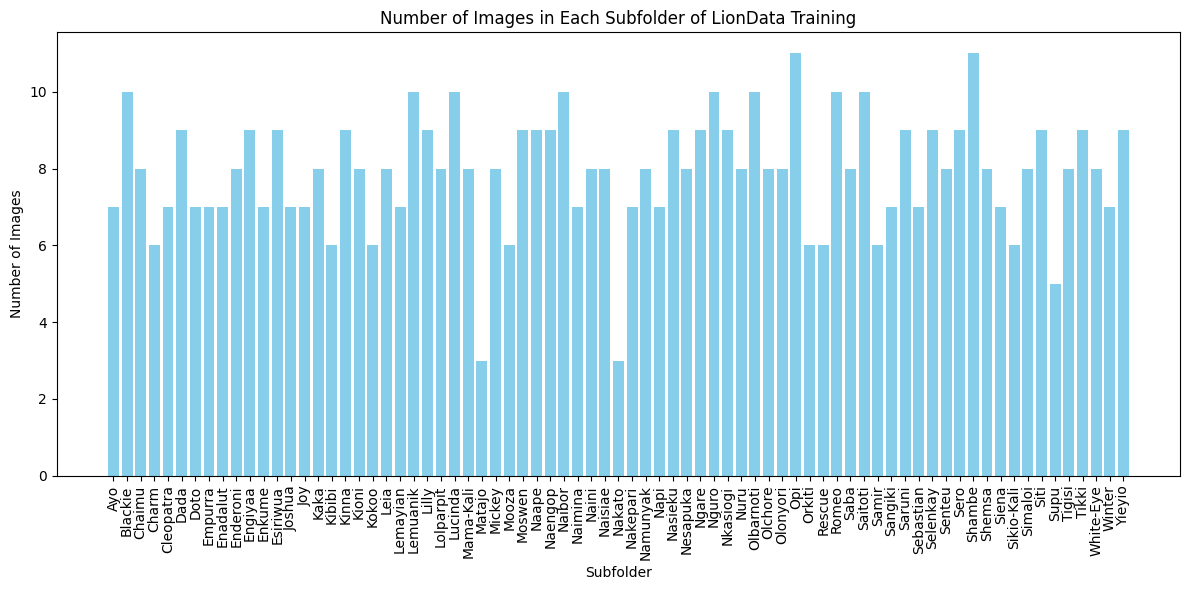

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(subfolder_counts.keys(), subfolder_counts.values(), color='skyblue')
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subfolder of LionData Training')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
print(len(cow_number))

75


In [39]:
import os

def count_files_in_subfolders(folder_path):
    # Initialize a dictionary to store the count of files in each subfolder
    subfolder_counts = {}

    # Get the path to the Cows-training folder
    cows_training_folder = os.path.join(folder_path, "val")

    # Iterate over all subfolders in the Cows-training folder
    for root, dirs, files in os.walk(cows_training_folder):
        # Get the folder name (e.g., Cow1, Cow2, etc.)
        if root != cows_training_folder:
            folder_name = os.path.basename(root)

            # Get the number of files in the current subfolder
            file_count = len(files)

            # Store the count in the dictionary with the subfolder name as key
            subfolder_counts[folder_name] = file_count
    return subfolder_counts

# Specify the path to the parent folder containing the Cows-training folder
parent_folder_path = r"data\LionData\wildlife_reidentification-main\Lion_Data_Zero"

# Get the counts of files in each subfolder within the Cows-training folder
subfolder_counts = count_files_in_subfolders(parent_folder_path)

# Print the counts
cow_number = dict()
for subfolder, count in subfolder_counts.items():
#     print(f"Subfolder: {subfolder}, Number of Files: {count}")
    cow_number[subfolder] = count
print(cow_number)

{'Amber': 6, 'Arria': 8, 'Autumn': 5, 'Bibi': 8, 'Etana': 9, 'Hasani': 4, 'Jamal': 10, 'Manzy': 8, 'Mashavu': 9, 'Maskio': 8, 'Napono': 8, 'Nariku-Inkgera': 9, 'Nashipai': 9, 'Sadala': 11, 'Safi': 8, 'Saimutie': 8, 'Spot': 4, 'Spring': 7, 'Summer': 7}


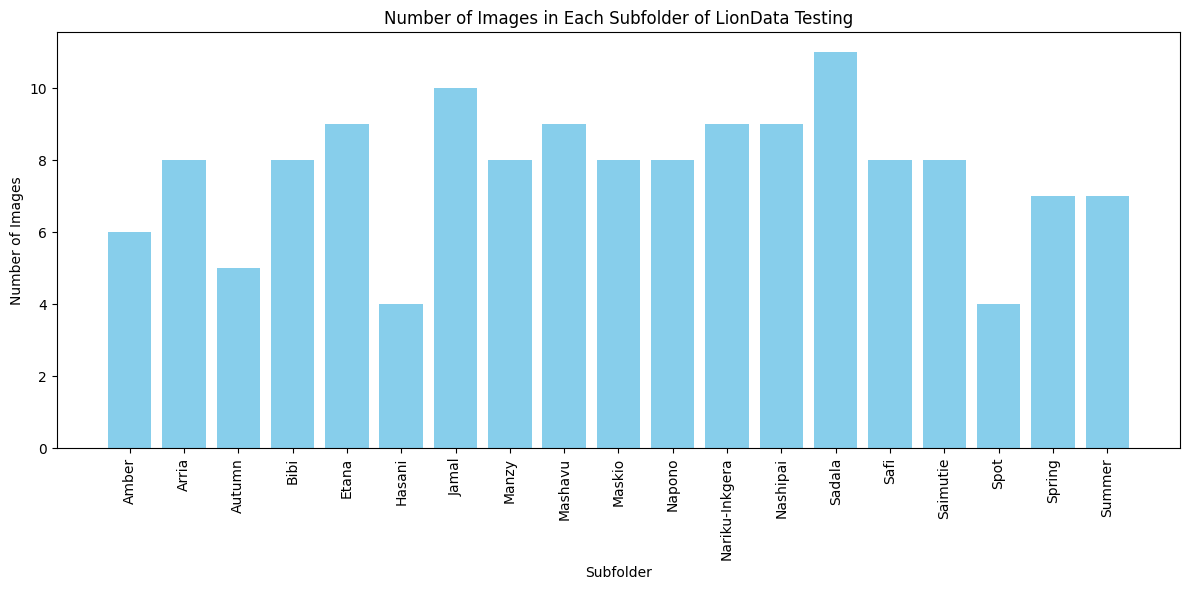

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(subfolder_counts.keys(), subfolder_counts.values(), color='skyblue')
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subfolder of LionData Testing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
print(len(cow_number))

19


In [33]:
import os

def count_files_in_subfolders(folder_path):
    # Initialize a dictionary to store the count of files in each subfolder
    subfolder_counts = {}

    # Get the path to the Cows-training folder
    cows_training_folder = os.path.join(folder_path, "Cows-testing")

    # Iterate over all subfolders in the Cows-training folder
    for root, dirs, files in os.walk(cows_training_folder):
        # Get the folder name (e.g., Cow1, Cow2, etc.)
        if root != cows_training_folder:
            folder_name = os.path.basename(root)

            # Get the number of files in the current subfolder
            file_count = len(files)

            # Store the count in the dictionary with the subfolder name as key
            subfolder_counts[folder_name] = file_count
    return subfolder_counts

# Specify the path to the parent folder containing the Cows-training folder
parent_folder_path = r"data\FriesianCattle2015\wurzq71kfm561ljahbwjhx9n3"

# Get the counts of files in each subfolder within the Cows-training folder
subfolder_counts = count_files_in_subfolders(parent_folder_path)

# Print the counts
cow_number = dict()
for subfolder, count in subfolder_counts.items():
#     print(f"Subfolder: {subfolder}, Number of Files: {count}")
    cow_number[subfolder] = count
print(cow_number)

{'Cow1': 12, 'Cow10': 7, 'Cow11': 12, 'Cow12': 12, 'Cow13': 10, 'Cow14': 9, 'Cow15': 12, 'Cow16': 8, 'Cow17': 11, 'Cow18': 11, 'Cow19': 12, 'Cow2': 12, 'Cow20': 11, 'Cow21': 11, 'Cow22': 8, 'Cow23': 12, 'Cow24': 9, 'Cow25': 10, 'Cow26': 12, 'Cow27': 4, 'Cow28': 4, 'Cow29': 4, 'Cow3': 6, 'Cow30': 5, 'Cow31': 10, 'Cow32': 9, 'Cow33': 10, 'Cow34': 7, 'Cow35': 5, 'Cow36': 10, 'Cow37': 5, 'Cow38': 10, 'Cow39': 8, 'Cow4': 8, 'Cow40': 10, 'Cow5': 12, 'Cow6': 10, 'Cow7': 12, 'Cow8': 12, 'Cow9': 12}


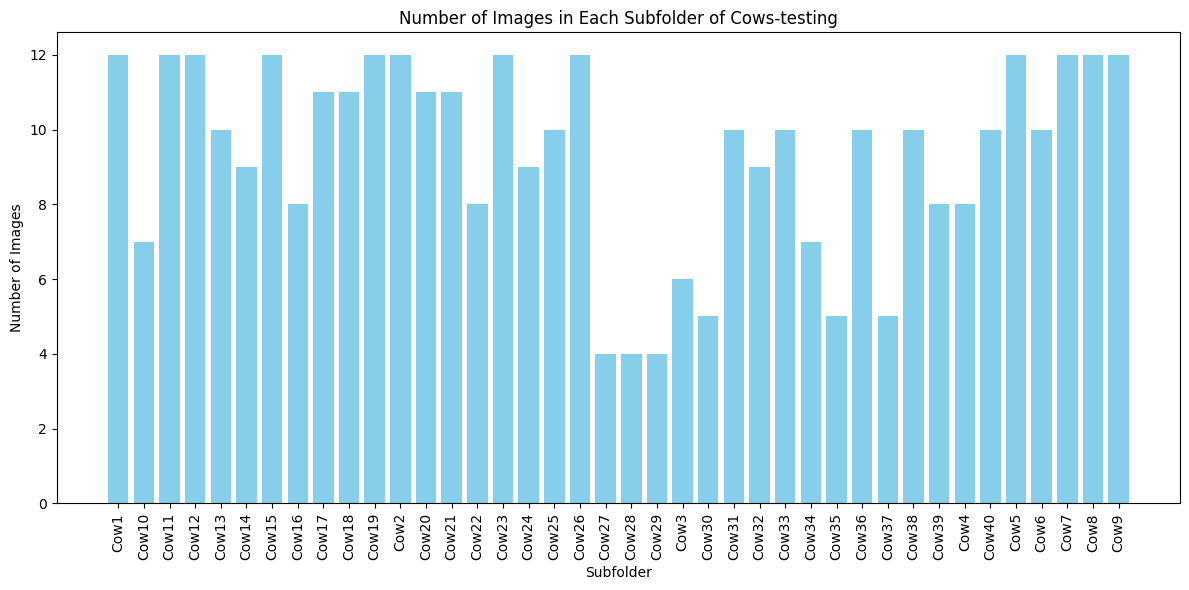

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(subfolder_counts.keys(), subfolder_counts.values(), color='skyblue')
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subfolder of Cows-testing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
print(len(cow_number))

40


In [36]:
import os

def count_files_in_subfolders(folder_path):
    # Initialize a dictionary to store the count of files in each subfolder
    subfolder_counts = {}

    # Get the path to the Cows-training folder
    cows_training_folder = os.path.join(folder_path, "Cows-training")

    # Iterate over all subfolders in the Cows-training folder
    for root, dirs, files in os.walk(cows_training_folder):
        # Get the folder name (e.g., Cow1, Cow2, etc.)
        if root != cows_training_folder:
            folder_name = os.path.basename(root)

            # Get the number of files in the current subfolder
            file_count = len(files)

            # Store the count in the dictionary with the subfolder name as key
            subfolder_counts[folder_name] = file_count
    return subfolder_counts

# Specify the path to the parent folder containing the Cows-training folder
parent_folder_path = r"data\FriesianCattle2015\wurzq71kfm561ljahbwjhx9n3"

# Get the counts of files in each subfolder within the Cows-training folder
subfolder_counts = count_files_in_subfolders(parent_folder_path)

# Print the counts
cow_number = dict()
for subfolder, count in subfolder_counts.items():
#     print(f"Subfolder: {subfolder}, Number of Files: {count}")
    cow_number[subfolder] = count
print(cow_number)

{'Cow1': 12, 'Cow10': 7, 'Cow2': 12, 'Cow3': 6, 'Cow4': 8, 'Cow5': 12, 'Cow6': 10, 'Cow7': 12, 'Cow8': 12, 'Cow9': 12}


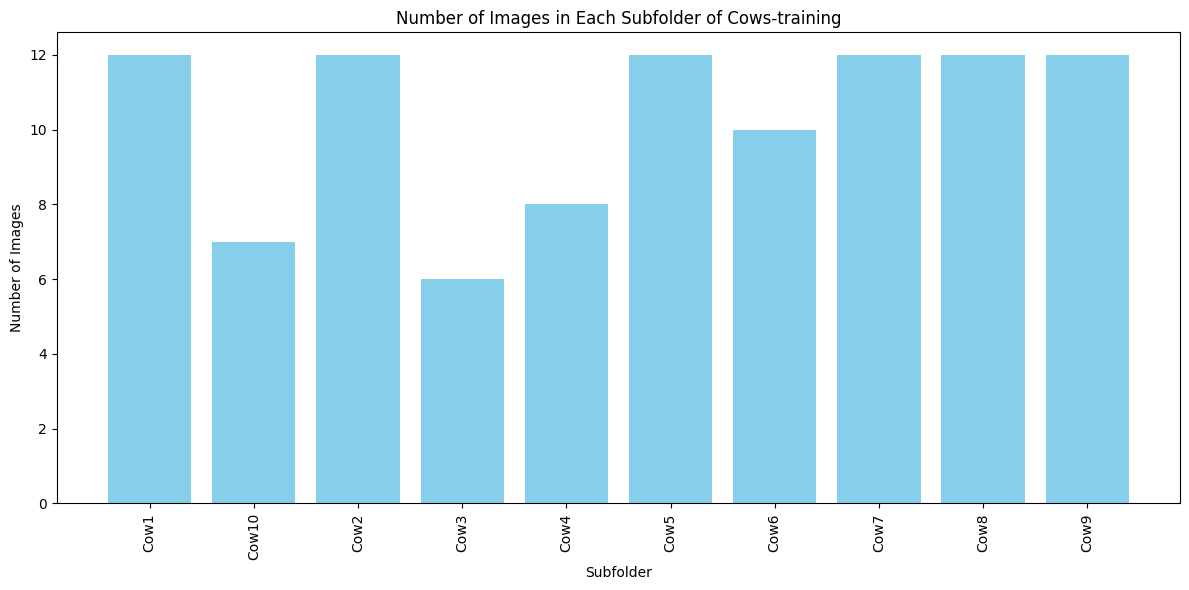

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(subfolder_counts.keys(), subfolder_counts.values(), color='skyblue')
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subfolder of Cows-training')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
print(len(cow_number))

10


In [124]:
import csv

# Initialize dictionaries to store counts for each split
train_count = {}
test_count = {}

# Open and read the CSV file
with open(r'metadata\datasets\FriesianCattle2015\metadata.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # Iterate through each row
    for row in reader:
        identity = row['identity']
        split = row['split']
        
        # Update counts based on the split
        if split == 'train':
            train_count[identity] = train_count.get(identity, 0) + 1
        elif split == 'test':
            test_count[identity] = test_count.get(identity, 0) + 1

# Print the counts for each split
print("Train Count:")
print(train_count)
print("\nTest Count:")
print(test_count)


Train Count:
{'16': 5, '9': 16, '26': 8, '3': 6, '2': 16, '20': 7, '40': 6, '25': 6, '4': 10, '37': 2, '6': 13, '15': 8, '31': 6, '7': 16, '27': 1, '10': 8, '36': 6, '8': 16, '1': 16, '17': 7, '5': 16, '12': 8, '24': 6, '18': 7, '21': 7, '23': 8, '33': 6, '34': 4, '28': 1, '35': 2, '32': 6, '22': 5, '38': 6, '30': 2, '11': 8, '39': 5, '13': 6, '19': 8, '14': 6, '29': 1}

Test Count:
{'2': 4, '26': 2, '22': 1, '25': 2, '18': 2, '38': 2, '27': 1, '33': 2, '8': 4, '9': 4, '31': 2, '3': 2, '1': 4, '20': 2, '6': 3, '21': 2, '11': 2, '17': 2, '15': 2, '40': 2, '24': 1, '30': 1, '16': 1, '7': 4, '5': 4, '36': 2, '4': 2, '12': 2, '39': 1, '29': 1, '13': 2, '23': 2, '28': 1, '19': 2, '32': 1, '14': 1, '34': 1, '37': 1, '10': 2, '35': 1}


In [93]:
# sort after conveerting to integers
train_count = {int(k): v for k, v in train_count.items()}
test_count = {int(k): v for k, v in test_count.items()}
train_count = dict(sorted(train_count.items()))
test_count = dict(sorted(test_count.items()))

In [105]:
print(train_count)
print(test_count)

{'Dan': 152, 'Judd': 144, 'Lala': 152, 'Leah': 152, 'Libby': 144, 'Linz': 152, 'Love': 144, 'Lydia': 144, 'Maj': 152, 'Meesha': 144, 'Meg': 144, 'Melody': 144, 'Mindy': 152, 'Ocelot': 152, 'Rupee': 152, 'Saphy': 152, 'Serena': 152, 'Shirley': 144, 'Sizzle': 136, 'Sol': 144, 'Sonja': 152, 'Spice': 152, 'Star': 136, 'Sugar': 152, 'Tamara': 152, 'Tass': 152, 'Tea': 152, 'Teal': 152, 'Tes': 152, 'Thyme': 152, 'Umbrella': 136, 'Ursula': 136, 'Venus': 152, 'Verity': 144}
{'Dan': 38, 'Judd': 36, 'Lala': 38, 'Leah': 38, 'Libby': 36, 'Linz': 38, 'Love': 36, 'Lydia': 36, 'Maj': 38, 'Meesha': 36, 'Meg': 36, 'Melody': 36, 'Mindy': 38, 'Ocelot': 38, 'Rupee': 38, 'Saphy': 38, 'Serena': 38, 'Shirley': 36, 'Sizzle': 34, 'Sol': 36, 'Sonja': 38, 'Spice': 38, 'Star': 34, 'Sugar': 38, 'Tamara': 38, 'Tass': 38, 'Tea': 38, 'Teal': 38, 'Tes': 38, 'Thyme': 38, 'Umbrella': 34, 'Ursula': 34, 'Venus': 38, 'Verity': 36}


In [125]:
print(sum(train_count.values()))
print(sum(test_count.values()))

297
80


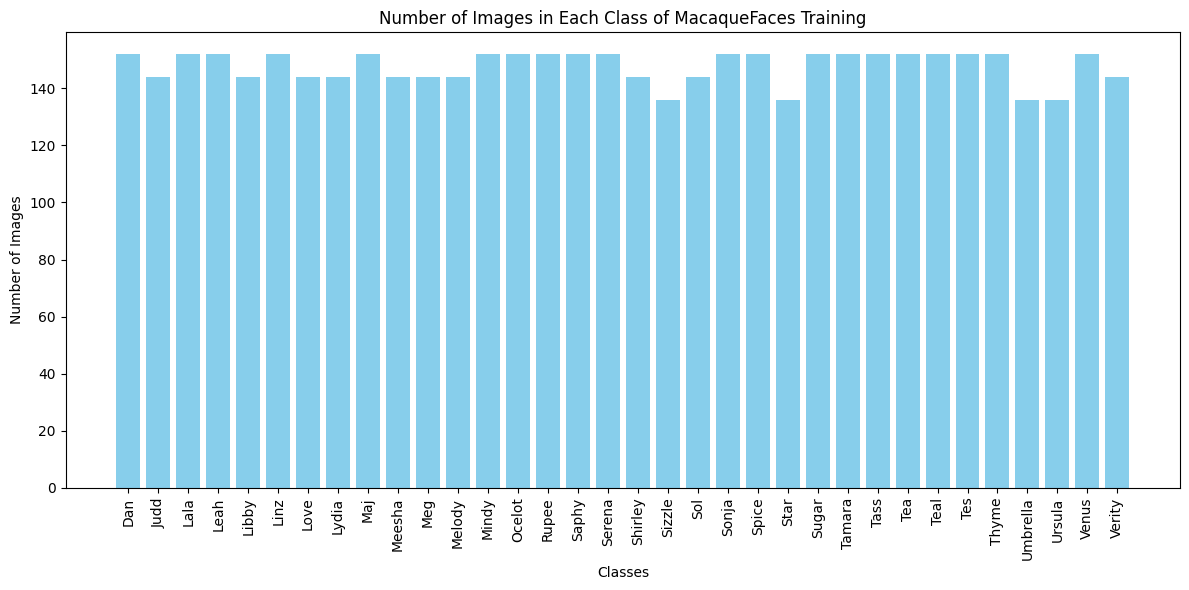

In [109]:
plt.figure(figsize=(12, 6))
plt.bar(train_count.keys(), train_count.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class of MacaqueFaces Training')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

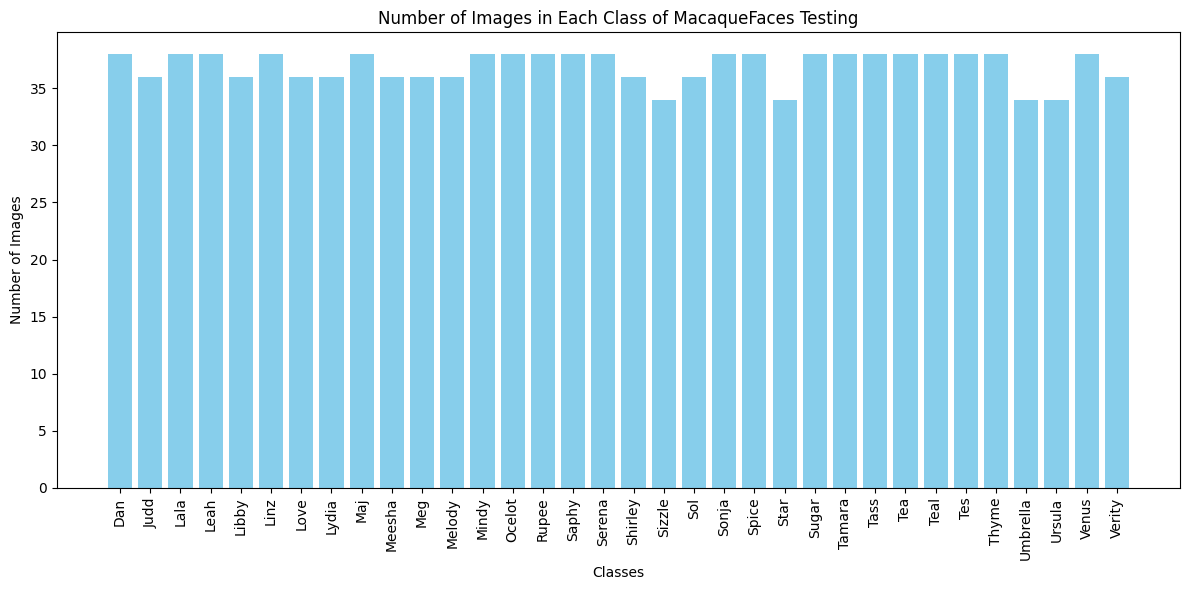

In [110]:
plt.figure(figsize=(12, 6))
plt.bar(test_count.keys(), test_count.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class of MacaqueFaces Testing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [114]:
print(len(train_count), len(test_count))

40 40
